In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", False)

### Carga del dataset obesidad

In [47]:
obesidad = pd.read_csv("data_obesidad.csv")

In [48]:
obesidad.head(5)

,"Countries, territories and areas",Both sexes,Male,Female
0,Afghanistan,19.7 [15.8-24.0],17.1 [11.8-23.6],22.2 [16.8-28.5]
1,Albania,58.7 [53.8-63.5],64.9 [57.9-71.4],52.8 [45.8-59.6]
2,Algeria,60.7 [56.0-65.4],56.7 [49.7-63.5],64.8 [58.3-71.0]
3,Andorra,68.1 [63.1-72.7],74.5 [67.8-80.3],61.9 [54.6-68.8]
4,Angola,23.9 [19.0-29.2],17.2 [10.9-24.1],30.4 [23.1-38.5]


In [49]:
obesidad[((obesidad["Both sexes"]=="No data")
         |(obesidad["Male"]=="No data")
         |(obesidad["Female"]=="No data"))]

,"Countries, territories and areas",Both sexes,Male,Female
112,Monaco,No data,No data,No data
149,San Marino,No data,No data,No data
162,South Sudan,No data,No data,No data
165,Sudan,No data,No data,No data


In [50]:
obesidad = obesidad[~((obesidad["Both sexes"]=="No data")
         |(obesidad["Male"]=="No data")
         |(obesidad["Female"]=="No data"))]

In [51]:
obesidad["ambos_sexos"] = obesidad["Both sexes"].apply(lambda x: str(x).split(" ")[0]).astype(float)
obesidad["masculino"] = obesidad["Male"].apply(lambda x: str(x).split(" ")[0]).astype(float)
obesidad["femenino"] = obesidad["Female"].apply(lambda x: str(x).split(" ")[0]).astype(float)

obesidad["ambos_sexos_min"] = obesidad["Both sexes"].apply(lambda x: str(x).split(" ")[1].split("-")[0][1:]).astype(float)
obesidad["masculino_min"] = obesidad["Male"].apply(lambda x: str(x).split(" ")[1].split("-")[0][1:]).astype(float)
obesidad["femenino_min"] = obesidad["Female"].apply(lambda x: str(x).split(" ")[1].split("-")[0][1:]).astype(float)

obesidad["ambos_sexos_max"] = obesidad["Both sexes"].apply(lambda x: str(x).split(" ")[1].split("-")[1][:-1]).astype(float)
obesidad["masculino_max"] = obesidad["Male"].apply(lambda x: str(x).split(" ")[1].split("-")[1][:-1]).astype(float)
obesidad["femenino_max"] = obesidad["Female"].apply(lambda x: str(x).split(" ")[1].split("-")[1][:-1]).astype(float)

obesidad

,"Countries, territories and areas",Both sexes,Male,Female,ambos_sexos,masculino,femenino,ambos_sexos_min,masculino_min,femenino_min,ambos_sexos_max,masculino_max,femenino_max
0,Afghanistan,19.7 [15.8-24.0],17.1 [11.8-23.6],22.2 [16.8-28.5],19.7,17.1,22.2,15.8,11.8,16.8,24.0,23.6,28.5
1,Albania,58.7 [53.8-63.5],64.9 [57.9-71.4],52.8 [45.8-59.6],58.7,64.9,52.8,53.8,57.9,45.8,63.5,71.4,59.6
2,Algeria,60.7 [56.0-65.4],56.7 [49.7-63.5],64.8 [58.3-71.0],60.7,56.7,64.8,56.0,49.7,58.3,65.4,63.5,71.0
3,Andorra,68.1 [63.1-72.7],74.5 [67.8-80.3],61.9 [54.6-68.8],68.1,74.5,61.9,63.1,67.8,54.6,72.7,80.3,68.8
4,Angola,23.9 [19.0-29.2],17.2 [10.9-24.1],30.4 [23.1-38.5],23.9,17.2,30.4,19.0,10.9,23.1,29.2,24.1,38.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,62.6 [58.4-66.9],62.0 [55.9-68.2],63.2 [57.1-69.1],62.6,62.0,63.2,58.4,55.9,57.1,66.9,68.2,69.1
191,Vietnam,18.3 [14.7-21.7],15.9 [11.5-21.0],20.5 [15.6-25.8],18.3,15.9,20.5,14.7,11.5,15.6,21.7,21.0,25.8
192,Yemen,42.3 [37.5-47.3],38.3 [31.0-45.4],46.3 [39.5-53.0],42.3,38.3,46.3,37.5,31.0,39.5,47.3,45.4,53.0
193,Zambia,23.9 [20.2-27.9],16.7 [11.8-22.5],31.0 [25.6-36.9],23.9,16.7,31.0,20.2,11.8,25.6,27.9,22.5,36.9


In [52]:
obesidad.isnull().sum()

Countries, territories and areas    0
Both sexes                          0
Male                                0
Female                              0
ambos_sexos                         0
masculino                           0
femenino                            0
ambos_sexos_min                     0
masculino_min                       0
femenino_min                        0
ambos_sexos_max                     0
masculino_max                       0
femenino_max                        0
dtype: int64

### Carga del dataset covid.csv

In [2]:
covid = pd.read_csv("covid.csv", sep=";")
covid.sample(5)

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
51065,811,8,Belarus,Europe,100.577535
11528,0,0,Trinidad and Tobago,America,1.003607
48963,219,26,Bolivia,America,33.266447
60571,5,0,Saint Lucia,America,25.711863
57226,2060,38,Bangladesh,Asia,16.622899


#### Descripcion de las variable
- **cases**  
Numérica discreta | Cantidad de casos de covid-19  

- **deaths**  
Numérica discreta | Cantidad de muertes por covid-19  

- **countriesAndTerritories**  
Categórica discreta | Pais  

- **continentExp**  
Categórica discreta | Continente  

- **Cumulative_number_for_14_days_of_COVID-19_cases_per_100000**  
Numérica continua | Casos de covid-19 por cada 100 000 habitantes

### Limpieza

In [3]:
### Cantidad de valores nulos
covid.isnull().sum()

cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [4]:
covid.sample()

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
32315,0,0,Liechtenstein,Europe,5.211319


In [5]:
covid[covid["continentExp"]=="Other"]

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
12,0,0,Japan,Other,NaN
79,0,0,Japan,Other,NaN
146,0,0,Japan,Other,NaN
213,0,0,Japan,Other,NaN
280,0,0,Japan,Other,NaN
...,...,...,...,...,...
3970,0,2,Japan,Other,NaN
4038,0,0,Japan,Other,NaN
4105,0,0,Japan,Other,NaN
4557,-9,1,Japan,Other,NaN


In [6]:
covid.loc[(covid["continentExp"]=="Other"), "continentExp"] = "Asia"

In [7]:
covid["cases"] = covid["cases"].abs()
covid["deaths"] = covid["deaths"].abs()
covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] = covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].abs()

In [9]:
covid.loc[(covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isna())
          &(covid["deaths"]==0)
          &(covid["cases"]==0), "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] = 0


In [10]:
covid.loc[(covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isna())].sort_values(by="cases")
        #   , "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] 

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
3769,0,1,Japan,Asia,NaN
3970,0,2,Japan,Asia,NaN
9432,0,1,Northern Mariana Islands,Oceania,NaN
9074,0,1,Turks and Caicos islands,America,NaN
8219,0,1,Northern Mariana Islands,Oceania,NaN
...,...,...,...,...,...
6336,289,9,Turkey,Europe,NaN
6519,293,7,Turkey,Europe,NaN
5983,311,5,Turkey,Europe,NaN
6705,343,7,Turkey,Europe,NaN


In [11]:
print(covid.loc[(covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isna())]["cases"].quantile(0.05))
print(covid.loc[(covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isna())]["cases"].quantile(0.95))

1.0
34.0


In [14]:
prom_fill = covid.loc[(covid["cases"]>1)&((covid["cases"]<34))]["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].mean()
prom_fill

np.float64(29.010344214939742)

In [15]:
covid.loc[(covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"].isna()), "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"] = prom_fill

In [ ]:
covid.loc[(covid["cases"]==0)&(covid["deaths"]>0)]

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
684,0,1,China,Asia,21.221532
952,0,1,China,Asia,0.002232
3040,0,1,France,Europe,0.007461
3769,0,1,Japan,Asia,21.221532
3970,0,2,Japan,Asia,21.221532
...,...,...,...,...,...
59829,0,11,El Salvador,America,38.242518
60740,0,1,Malawi,Africa,0.182514
60895,0,6,El Salvador,America,44.270208
60998,0,1,Saint Lucia,America,19.147132


In [111]:
covid.loc[(covid["cases"]<covid["deaths"])&((covid["cases"]!=0))]

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
4855,1,2,San Marino,Europe,194.467826
7771,2,4,Honduras,America,1.364646
8771,4,7,Honduras,America,2.483041
9145,3,7,Egypt,Africa,0.743116
11177,352,1290,China,Asia,0.089902
11409,405,761,France,Europe,67.022933
12051,2,3,Isle of Man,Europe,190.332076
12872,1,2,Isle of Man,Europe,126.493989
13695,1,3,Isle of Man,Europe,79.206516
13771,1,3,Slovenia,Europe,9.034518


In [16]:
covid

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,0,0,Afghanistan,Asia,0.000000
1,0,0,Algeria,Africa,0.000000
2,0,0,Armenia,Europe,0.000000
3,0,0,Australia,Oceania,0.000000
4,0,0,Austria,Europe,0.000000
...,...,...,...,...,...
61895,0,0,Wallis and Futuna,Oceania,0.000000
61896,0,0,Western Sahara,Africa,0.000000
61897,0,0,Yemen,Asia,0.020575
61898,57,1,Zambia,Africa,3.728787


### Transformaciones

In [17]:
covid_by_country = covid.groupby(["countriesAndTerritories","continentExp"]).agg({
    "cases":"sum",
    "deaths":"sum",
    "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000":"mean"}).reset_index()

In [18]:
covid_by_country = covid_by_country.sort_values(by="cases", ascending=False)
covid_by_country

,countriesAndTerritories,continentExp,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
202,United States of America,America,16256754,299177,180.901009
91,India,Asia,9884100,143355,28.428557
27,Brazil,America,6901952,181402,125.615139
159,Russia,Europe,2653928,46941,67.824195
69,France,Europe,2378384,57911,137.111388
...,...,...,...,...,...
131,Montserrat,America,13,1,10.757858
5,Anguilla,America,10,0,2.368215
123,Marshall Islands,Oceania,4,0,2.173421
208,Wallis and Futuna,Oceania,3,0,1.475102


In [19]:
covid_by_country["indice_mortalidad"] = (covid_by_country["deaths"].astype(float) / covid_by_country["cases"].astype(float))*100
covid_by_country

,countriesAndTerritories,continentExp,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,indice_mortalidad
202,United States of America,America,16256754,299177,180.901009,1.840324
91,India,Asia,9884100,143355,28.428557,1.450360
27,Brazil,America,6901952,181402,125.615139,2.628271
159,Russia,Europe,2653928,46941,67.824195,1.768737
69,France,Europe,2378384,57911,137.111388,2.434889
...,...,...,...,...,...,...
131,Montserrat,America,13,1,10.757858,7.692308
5,Anguilla,America,10,0,2.368215,0.000000
123,Marshall Islands,Oceania,4,0,2.173421,0.000000
208,Wallis and Futuna,Oceania,3,0,1.475102,0.000000


In [20]:
covid_cont = covid.groupby("continentExp").agg({"cases":"sum","deaths":"sum"}).reset_index()
covid_cont["ratio"] = covid_cont["deaths"]/covid_cont["cases"]
covid_cont = covid_cont.sort_values(by="ratio",ascending=False)
covid_cont


,continentExp,cases,deaths,ratio
1,America,30912097,785420,0.025408
0,Africa,2380477,56334,0.023665
3,Europe,21407342,483733,0.022597
4,Oceania,53440,1154,0.021594
2,Asia,16782980,291022,0.017340


### Graficas

In [21]:
# Total de casos de covid
covid_by_country[["cases","deaths"]].describe()

,cases,deaths
count,2.130000e+02,213.000000
mean,3.358513e+05,7594.661972
std,1.419308e+06,28497.765644
min,1.000000e+00,0.000000
25%,1.965000e+03,35.000000
50%,1.763800e+04,273.000000
75%,1.471500e+05,2552.000000
max,1.625675e+07,299177.000000


<Axes: xlabel='continentExp', ylabel='valor'>

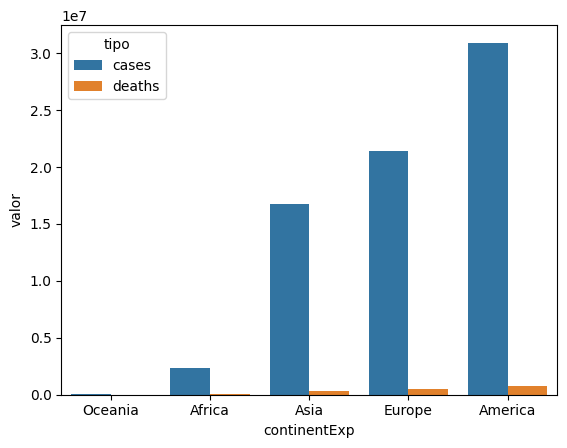

In [ ]:
df_1 = covid.groupby("continentExp").agg({"cases":"sum", "deaths":"sum"}).sort_values(by="cases").reset_index()

df_1=df_1.melt(id_vars='continentExp', value_vars=['cases', 'deaths'], 
                   var_name='tipo', value_name='valor')


sns.barplot(data=df_1, x='continentExp', y='valor', hue='tipo')

Text(0.5, 1.0, 'Paises con mas casos de covid-19')

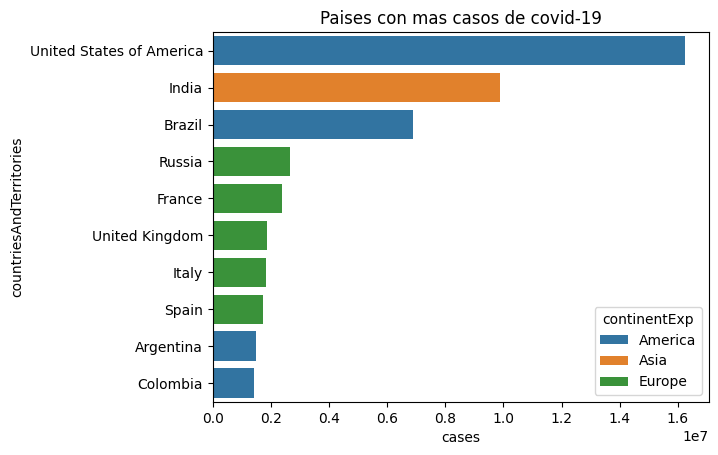

In [140]:
sns.barplot(covid_by_country.head(10), y="countriesAndTerritories", x="cases", hue="continentExp")
plt.title("Paises con mas casos de covid-19")

Text(0.5, 1.0, 'Paises con mas muertes por covid-19')

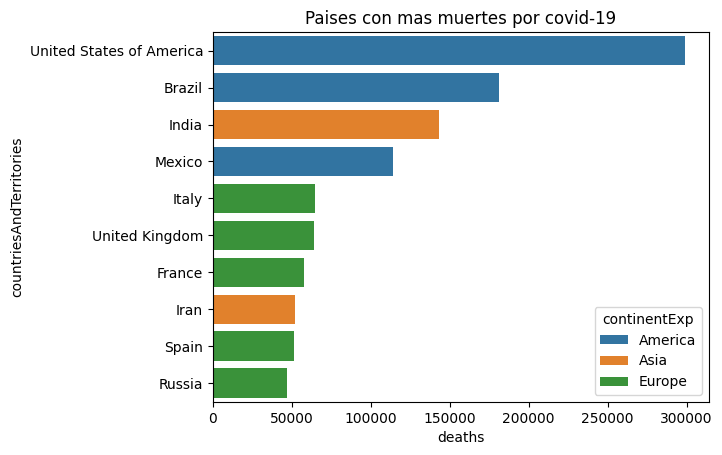

In [139]:
sns.barplot(covid_by_country.sort_values(by="deaths",ascending=False).head(10), y="countriesAndTerritories", x="deaths", hue="continentExp")
plt.title("Paises con mas muertes por covid-19")

Text(0.5, 1.0, 'Casos de covid/muertes por país')

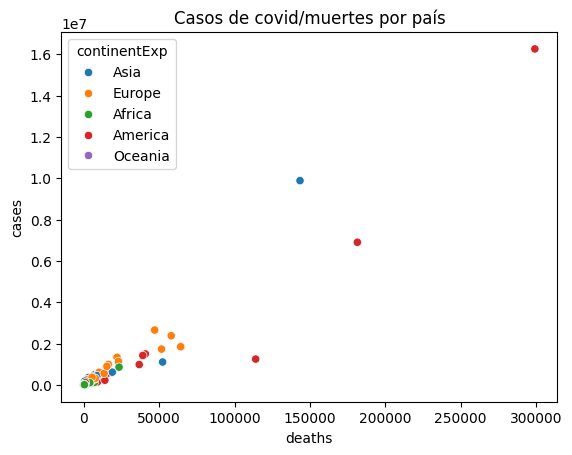

In [115]:
sns.scatterplot(covid_by_country, x="deaths", y="cases", hue="continentExp")
plt.title("Casos de covid/muertes por país")

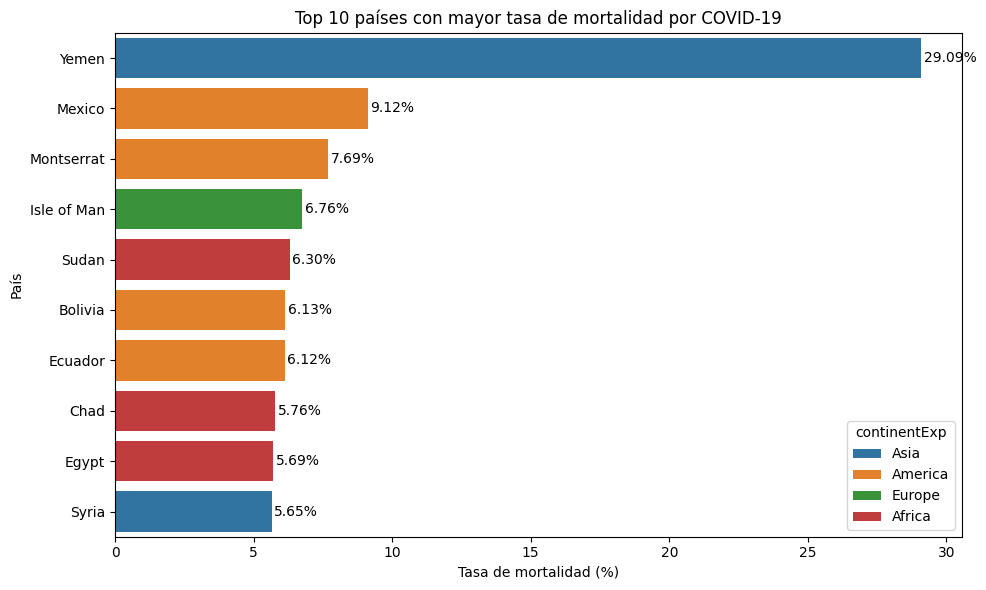

In [228]:
# Ordenar y seleccionar top 10
top10 = covid_by_country.sort_values(by="ratio_mortalidad", ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    y="countriesAndTerritories",
    x="ratio_mortalidad",
    hue="continentExp",
    dodge=False
)

# Agregar etiquetas de datos
for i, (valor, pais) in enumerate(zip(top10["ratio_mortalidad"], top10["countriesAndTerritories"])):
    ax.text(valor + 0.1, i, f"{valor:.2f}%", color="black", va="center")

# Título y etiquetas
plt.title("Top 10 países con mayor tasa de mortalidad por COVID-19")
plt.xlabel("Tasa de mortalidad (%)")
plt.ylabel("País")
plt.tight_layout()

In [23]:
covid_by_country.sort_values("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", ascending=False).head(10)

,countriesAndTerritories,continentExp,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,indice_mortalidad
3,Andorra,Europe,7338,79,466.277200,1.076588
130,Montenegro,Europe,41426,582,319.116459,1.404915
70,French Polynesia,Oceania,15618,91,279.483073,0.582661
116,Luxembourg,Europe,44042,396,261.819542,0.899142
9,Aruba,America,5049,46,244.410679,0.911071
80,Guam,Oceania,7106,118,216.562733,1.660569
14,Bahrain,Asia,89143,348,215.186742,0.390384
149,Panama,America,193007,3356,211.508420,1.738797
164,San Marino,Europe,1965,51,208.631051,2.595420
51,Czechia,Europe,581079,9617,207.435418,1.655025


Text(0.5, 1.0, 'Top 10 paises con mayor tasa de contagio (promedio de casos por cada 100 000 habitantes)')

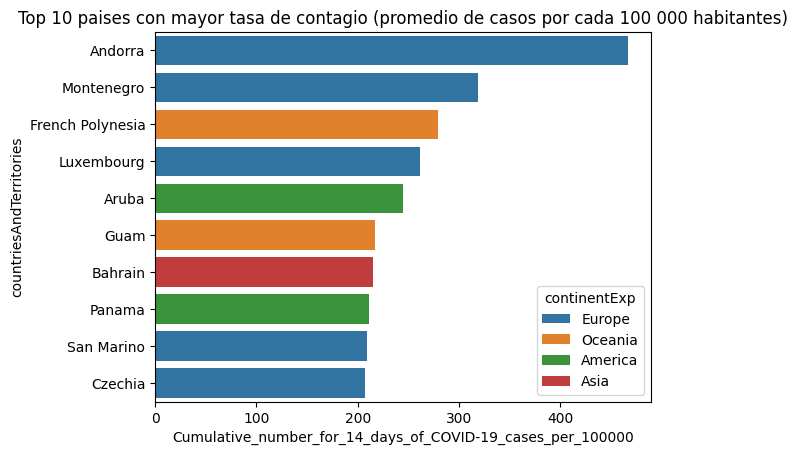

In [22]:
sns.barplot(covid_by_country.sort_values("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", ascending=False).head(10),
            x="Cumulative_number_for_14_days_of_COVID-19_cases_per_100000" ,
            y="countriesAndTerritories",
            hue="continentExp")
plt.title("Top 10 paises con mayor tasa de contagio (promedio de casos por cada 100 000 habitantes)")

### Cruce covid vs obesidad

In [31]:
covid.head(2)


,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,0,0,Afghanistan,Asia,0.0
1,0,0,Algeria,Africa,0.0


In [32]:
obesidad.head(2)

,"Countries, territories and areas",Both sexes,Male,Female,ambos_sexos,masculino,femenino,ambos_sexos_min,masculino_min,femenino_min,ambos_sexos_max,masculino_max,femenino_max
0,Afghanistan,19.7 [15.8-24.0],17.1 [11.8-23.6],22.2 [16.8-28.5],19.7,17.1,22.2,15.8,11.8,16.8,24.0,23.6,28.5
1,Albania,58.7 [53.8-63.5],64.9 [57.9-71.4],52.8 [45.8-59.6],58.7,64.9,52.8,53.8,57.9,45.8,63.5,71.4,59.6


In [53]:
cruce = pd.merge(covid_by_country,obesidad,'outer',left_on="countriesAndTerritories", right_on="Countries, territories and areas", indicator=True)

In [55]:
cruce[(cruce["_merge"]=="left_only")]

,countriesAndTerritories,continentExp,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,indice_mortalidad,"Countries, territories and areas",Both sexes,Male,Female,ambos_sexos,masculino,femenino,ambos_sexos_min,masculino_min,femenino_min,ambos_sexos_max,masculino_max,femenino_max,_merge
5,Anguilla,America,10.0,0.0,2.368215,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Aruba,America,5049.0,46.0,244.410679,0.911071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,Bermuda,America,431.0,9.0,26.248116,2.088167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24,"Bonaire, Saint Eustatius and Saba",America,173.0,3.0,34.931749,1.734104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
28,British Virgin Islands,America,76.0,1.0,12.855635,1.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
37,Cayman Islands,America,298.0,2.0,23.386515,0.671141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
47,Cote dIvoire,Africa,21680.0,133.0,5.285937,0.613469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
50,Curaçao,America,3624.0,11.0,99.097684,0.303532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
68,Falkland Islands (Malvinas),America,19.0,0.0,21.737599,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
69,Faroe Islands,Europe,528.0,0.0,52.008021,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [45]:
cruce[(cruce["_merge"]=="right_only")]

,countriesAndTerritories,continentExp,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,indice_mortalidad,"Countries, territories and areas",Both sexes,Male,Female,ambos_sexos,masculino,femenino,ambos_sexos_min,masculino_min,femenino_min,ambos_sexos_max,masculino_max,femenino_max,_merge
24,NaN,NaN,NaN,NaN,NaN,NaN,Bolivia (Plurinational State of),53.2 [47.9-58.6],49.2 [41.0-57.5],57.1 [50.2-64.0],53.2,49.2,57.1,47.9,41.0,50.2,58.6,57.5,64.0,right_only
34,NaN,NaN,NaN,NaN,NaN,NaN,Cabo Verde,32.1 [27.4-37.1],25.5 [19.1-32.7],38.8 [32.0-45.4],32.1,25.5,38.8,27.4,19.1,32.0,37.1,32.7,45.4,right_only
47,NaN,NaN,NaN,NaN,NaN,NaN,Cook Islands,83.9 [80.5-86.9],82.6 [77.7-87.2],85.1 [80.6-89.1],83.9,82.6,85.1,80.5,77.7,80.6,86.9,87.2,89.1,right_only
55,NaN,NaN,NaN,NaN,NaN,NaN,Côte d'Ivoire,28.7 [24.5-33.2],22.4 [16.6-28.7],35.2 [29.3-41.3],28.7,22.4,35.2,24.5,16.6,29.3,33.2,28.7,41.3,right_only
56,NaN,NaN,NaN,NaN,NaN,NaN,Democratic People's Republic of Korea,33.5 [28.0-38.8],34.8 [26.4-43.1],32.3 [25.3-39.7],33.5,34.8,32.3,28.0,26.4,25.3,38.8,43.1,39.7,right_only
90,NaN,NaN,NaN,NaN,NaN,NaN,Guinea-Bissau,26.9 [22.6-31.5],20.2 [14.4-27.0],33.5 [27.3-40.0],26.9,20.2,33.5,22.6,14.4,27.3,31.5,27.0,40.0,right_only
100,NaN,NaN,NaN,NaN,NaN,NaN,Iran (Islamic Republic of),60.9 [57.2-64.6],57.1 [51.9-62.6],64.6 [59.6-69.5],60.9,57.1,64.6,57.2,51.9,59.6,64.6,62.6,69.5,right_only
112,NaN,NaN,NaN,NaN,NaN,NaN,Kiribati,78.0 [73.9-81.9],75.7 [69.4-81.5],80.4 [74.9-85.3],78.0,75.7,80.4,73.9,69.4,74.9,81.9,81.5,85.3,right_only
116,NaN,NaN,NaN,NaN,NaN,NaN,Lao People's Democratic Republic,22.6 [18.9-26.6],20.2 [15.0-26.0],24.9 [19.7-30.7],22.6,20.2,24.9,18.9,15.0,19.7,26.6,26.0,30.7,right_only
136,NaN,NaN,NaN,NaN,NaN,NaN,Micronesia (Federated States of),70.1 [65.3-74.6],65.6 [58.5-72.3],74.7 [68.5-80.3],70.1,65.6,74.7,65.3,58.5,68.5,74.6,72.3,80.3,right_only


In [41]:
obesidad[obesidad["Countries, territories and areas"]=='Russia']

,"Countries, territories and areas",Both sexes,Male,Female,ambos_sexos,masculino,femenino,ambos_sexos_min,masculino_min,femenino_min,ambos_sexos_max,masculino_max,femenino_max
